# Lab Demo COMP7035 Week 9

## Lab Demo COMP7035 Week 9
### 1. Be famililar with Skikit-learn 
### 2. Using Scikit-learn for supervised learning 
### 3. Using Scikit-learn for unsupervised learning 

## Exercise 1: Basics

### Problem 1: Data manipulation: from Pandas to Scikit-learn
#### Task 1.1: Using Pandas.read_csv to input the data from an 000_example.csv file, where the column label "Group" is taken as the label and column labels "F1", "F2" and "F3" are taken as the data features. 
#### Task 1.2: Binary classification using BernoulliNB from sklearn.naive_bayes, outputting both classified results with probabilities.

In [4]:
import pandas

# Task 1.1 Write your code to input the data from the file "000_example.csv"
df=pandas.read_csv("000_example.csv")
print(df)
Group=df["Group"].values
Features = df[["F1","F2","F3"]].values
Features = Features.astype(float)
print(Features)

# Task 1.2 Using BernoulliNB to do pattern classification
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha=1.0)
clf.fit(Features,Group)

# Output the prediction results
print("Results:")
print(clf.predict_proba(Features))
print(clf.predict(Features))

   Group  F1  F2  F3
0      1   1   1   1
1      0   0   1   0
2      1   0   0   0
3      0   0   0   0
4      0   0   1   0
5      1   0   1   1
6      1   0   0   1
[[1. 1. 1.]
 [0. 1. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 1. 0.]
 [0. 1. 1.]
 [0. 0. 1.]]
Results:
[[0.1394148  0.8605852 ]
 [0.72160356 0.27839644]
 [0.63343109 0.36656891]
 [0.63343109 0.36656891]
 [0.72160356 0.27839644]
 [0.24471299 0.75528701]
 [0.17763158 0.82236842]]
[1 0 0 0 0 1 1]


### Problem 2: Principal Component Analysis (PCA)
#### Task 2.1: Using Pandas.read_csv to input the data file "007_PCA.csv", the results are stored in a Pandas format. We use the values of the column labels ["Sales_Tablets","Sales_Mobile_Phone","Sales_TVs","Sales_Radios"] to compose the features. 
#### Task 2.2 Using PCA to transform a high dimensional data into 2-dimensional ones. 
#### Task 2.3 Using scatter in the mathplotlib library to plot a 2-D figure, where 1st and 2nd dimensions separately refer to the X and Y axises. 

[[ 1.44750215  1.4993989   1.04806976  0.73921498]
 [ 1.40394175  1.44115316 -0.99291964 -0.73437094]
 [-1.13754136 -1.13558218  0.86266407  0.69675931]
 ...
 [ 1.58845223  1.60600778 -0.00314012 -0.2808902 ]
 [ 0.16435977  0.25789669 -1.00840188 -1.02927146]
 [-0.47021725 -0.28446628  0.53292464  0.63577096]]


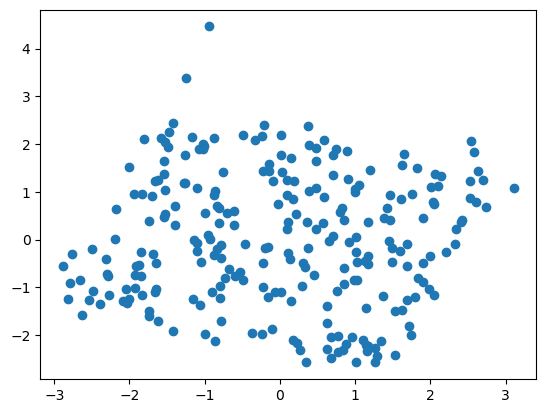

In [6]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas
from sklearn import preprocessing

# Task 2.1 Write your codes here to input the CSV file
df=pandas.read_csv("007_PCA.csv",index_col=False,header=0)
data=df[["Sales_Tablets","Sales_Mobile_Phone","Sales_TVs","Sales_Radios"]].values
data=preprocessing.scale(data)
print(data)
# Task 2.2 Write your codes for the PCA Transformation 
pca=PCA(n_components=2)
pca.fit(data)
result = pca.transform(data)

# Task 2.3 Write your codes to plot the results
plt.scatter(result[:,0],result[:,1])
plt.show()

### Problem 3: K-Means 
#### Task 3.1 Using Pandas.read_csv to input the data file "002_customer_website.csv", and employ the column labels "Time_Website_minutes" and "Purchases_in_$" as the data features. 
#### Task 3.2 Using the data to fit a K-means classifier and output the clustering results 

In [7]:
pip install threadpoolctl==3.1.0


  Attempting uninstall: threadpoolctl
    Found existing installation: threadpoolctl 2.2.0
    Uninstalling threadpoolctl-2.2.0:
      Successfully uninstalled threadpoolctl-2.2.0


In [12]:
from sklearn import datasets
import numpy as np
import pandas
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn import preprocessing

# Task 3.1 Write your codes to read the data file '002_customer_website.csv'
df = pandas.read_csv("002_customer_website.csv")
data=df[["Time_Website_minutes","Purchases_in_$"]].values
data=preprocessing.scale(data)

# Task 3.2 Fitting the K-Means for clustering 
ds = KMeans(n_clusters=2)
ds.fit(data)
centers = ds.cluster_centers_
labels=ds.labels_
siho=metrics.silhouette_samples(data,ds.labels_)
print(siho<-0.5)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(data,ds.labels_))
#siho = metrics.silhouette_samples(data,ds.labels_)

#print(siho<-0.5)
#print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(data, ds.labels_))

C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

### Problem 4: Gaussian Mixture Model
#### Given the make_blobs dataset, your task is to build a Gaussian Mixture Model for pattern classification.

prediction results:
[3 2 2 3 2 0 1 3 2 1 0 1 3 2 2 1 2 1 3 2 2 2 0 3 3 0 0 3 3 1 3 3 2 3 2 0 1
 3 1 3 2 0 1 3 1 0 1 1 1 0 0 0 2 0 0 2 3 1 1 2 1 1 1 1 3 2 1 3 2 0 2 3 2 0
 1 2 3 2 0 2 2 3 1 0 3 2 2 3 2 1 2 1 3 2 2 0 3 1 1 1 0 1 3 3 2 0 3 0 1 2 2
 2 3 2 0 1 0 2 0 0 1 2 1 0 3 0 1 1 1 3 0 0 0 2 3 2 0 3 0 2 3 2 2 0 2 1 3 2
 1 2 1 3 1 3 0 2 1 2 2 2 3 2 0 2 2 0 1 1 2 0 0 0 0 1 1 1 3 2 3 0 3 0 2 3 0
 2 0 3 3 0 3 3 0 2 0 0 0 1 1 3 3 2 1 1 0 3 2 0 3 0 3 3 1 1 0 1 3 0 1 0 2 3
 0 2 2 2 1 0 3 0 3 2 3 3 0 1 2 1 3 2 1 3 3 0 1 3 0 3 1 2 2 1 2 3 0 0 3 3 1
 0 3 2 2 2 0 3 3 3 3 3 1 3 3 0 2 1 0 1 1 1 0 1 1 0 0 0 1 3 1 3 1 2 3 1 2 3
 1 1 3 2 0 0 3 0 1 1 3 0 0 1 1 3 0 3 1 3 1 0 2 2 1 2 3 2 2 0 2 0 1 2 0 1 0
 3 2 3 2 1 3 1 0 1 1 1 1 0 1 2 1 2 1 3 0 2 1 1 3 2 2 0 0 0 2 3 1 3 2 1 2 0
 2 3 3 2 0 3 0 0 2 0 2 0 3 3 3 2 0 0 0 0 2 0 3 1 1 3 3 1 3 1]


C:\ProgramData\Anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


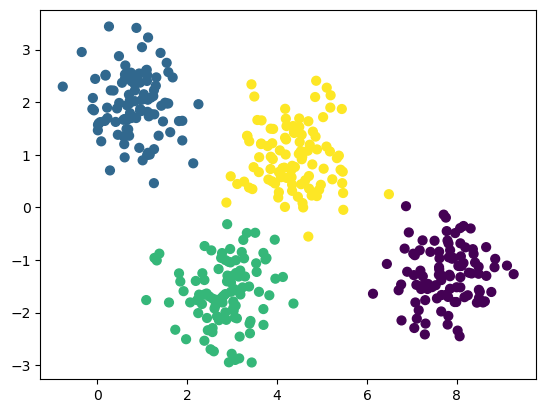

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import make_blobs
from sklearn import mixture

X, y_true = make_blobs(n_samples=400, centers=4, cluster_std=0.60, random_state=0)
X = X[:, ::-1]

## Write your codes to build a GMM for pattern classification
gmm=mixture.GaussianMixture(n_components=4)
gmm.fit(X)
labels=gmm.predict(X)
print("prediction results:")
print(labels)
plt.scatter(X[:,0],X[:,1],c=labels,s=40,cmap='viridis')
#print("prediction results:")
#print(labels)
#plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis')

## Problem 5: Support Vector Machines (SVM)
### Read the data file "001_customer.csv" and get the feature and label information
### Task 5.1 Train a SVM model for classifying the data 
### Task 5.2 Train a linear SVM model with a L1-norm regularization (Lassio)

In [17]:
import numpy
import pandas 
from sklearn import preprocessing
from sklearn.svm import SVC, LinearSVC

df = pandas.read_csv("001_customer.csv", index_col=False, header=0)
Group = df["Group"].values
print(Group.shape)
Features = df[["F1", "F2", "F3", "F4", "F5"]].values
Features = preprocessing.scale(Features)

# Task 4.1: Write your code to train a SVM model using SVC 
clf=SVC(C=0.01,kernel='linear')
clf.fit(Features,Group)
clf.decision_function(Features)

#predictions = clf.predict(Features)
#print("The classification accuracy of SVM is {}".format(numpy.sum(predictions==Group) / Group.shape[0]))

# Task 5.2: Write your code to train a linear SVM model with a L1-norm regularizaiton
cls=LinearSVC(penalty="l1",dual=False)
cls.fit(Features, Group)
predictions=cls.predict(Features)
print("The classification accuracy of linear SVM is {}".format(numpy.sum(predictions==Group) / Group.shape[0]))


(1000,)
The classification accuracy of linear SVM is 0.857


### Problem 6: Decision Tree 
#### Building a Decision Tree to classify the Iris dataset. The maximum depths of tree is 3.

In [23]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Data preparation
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target

X = iris_df.drop(['species'], axis = 1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Write your codes to build a decision tree and evaluate its performance 

print("The classification accuracy of decision tree is {}".format(np.sum(predictions==y_test) / y_test.shape[0]))

(120, 4) (30, 4) (120,) (30,)
The classification accuracy of decision tree is 0.9333333333333333


### Problem 7: Multi-layer Perceptron
#### Given the IRIS dataset, your task is to build an MLP classifier (with two hidden layers [75, 75]) for pattern classification.

In [22]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# Data preparation
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['species'] = iris.target

X = iris_df.drop(['species'], axis = 1)
y = iris_df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 13)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

## Write your codes to build an MLP
Model=DecisionTreeClassifier(random_state=13,max_depth=3)
Model.fit(X_train,y_train)
predictions=Model.predict(X_test)
print("The classification accuracy of MLP is {}".format(np.sum(predictions==y_test) / y_test.shape[0]))

(120, 4) (30, 4) (120,) (30,)
The classification accuracy of MLP is 0.9333333333333333


### Problem 8: Detecting Spam in Real SMS Kaggle Data (1)
#### Reading a real SMS Kaggle datafile "spam.csv"
#### Building a Multinomial Bayes model (MultinomialNB) for the pattern classification

In [25]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import pandas as pd


def create_index(variable):
    variable = variable.upper()
    sms[variable] = sms["v2"].str.upper().str.count(variable)
    return

def count_digits(x):   
    return sum(c.isdigit() for c in x)

sms = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
create_index("FREE")
create_index("WINNER")
create_index("REMINDER")
create_index("CONTRACT")
create_index("MOBILE")
create_index("URGENT")
create_index("IMPORTANT")
create_index("PRIVATE")
create_index("CALL")
create_index("SEX")
create_index("GUARANTEED")
create_index("CONGRATS")
create_index("DATING")
create_index("CASH")
create_index("CUSTOMER")
create_index("SMS")
create_index("ACCOUNT")
create_index("HEY")
create_index("AWARDED")
create_index("WON")
create_index("CHOSEN")
create_index("WOULD")
create_index("WIND")
create_index("HORNY")
create_index("INVITING")
create_index("CHOSEN")
create_index("SHOPPING")
create_index("ENTITLED")
create_index("WANT")
create_index("ENTRY")
create_index("SECRET")
create_index("DISCOUNT")
create_index("MESSAGE")
create_index("IMPORTANT")
create_index("XXX")
create_index("GIRLS")
create_index("CONTACT")


sms["spam"]     = sms["v1"]=="spam"
sms["spam"]     = sms["spam"].astype(int)
sms["exc_mark"] = sms["v2"].str.upper().str.count("!")
sms["digits"]   = sms["v2"].apply(lambda x: count_digits(x))


data = sms[["FREE","WINNER","REMINDER","CONTRACT","MOBILE","URGENT","IMPORTANT","PRIVATE","CALL","SEX","GUARANTEED",
            "CONGRATS","DATING","CASH","CUSTOMER","SMS","ACCOUNT","HEY","AWARDED","WON","CHOSEN","WOULD",
            "WIND","HORNY","INVITING","CHOSEN","SHOPPING","ENTITLED","WANT","ENTRY","SECRET","DISCOUNT",
            "MESSAGE","IMPORTANT","exc_mark","XXX","GIRLS","CONTACT","digits"]].values.reshape(5572,39)

## Write your codes to build a Multinomial model for pattern classification
clf=MultinomialNB()
clf.fit(data, sms["spam"].values)
sms["prediction"]=clf.predict(data)
scores = cross_val_score(clf, data, sms["spam"].values, cv=15)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.96 (+/- 0.02)


### Problem 9: Detecting Spam in Real SMS Kaggle Data (2)
#### Reading a real SMS Kaggle datafile "spam.csv"
#### Building a Multi-layer Perceptron (MLP) (with two hidden layers [75, 75]) for the pattern classification

In [29]:
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd


def create_index(variable):
    variable = variable.upper()
    sms[variable] = sms["v2"].str.upper().str.count(variable)
    return

def count_digits(x):   
    return sum(c.isdigit() for c in x)

sms = pd.read_csv("spam.csv",encoding = "ISO-8859-1")
create_index("FREE")
create_index("WINNER")
create_index("REMINDER")
create_index("CONTRACT")
create_index("MOBILE")
create_index("URGENT")
create_index("IMPORTANT")
create_index("PRIVATE")
create_index("CALL")
create_index("SEX")
create_index("GUARANTEED")
create_index("CONGRATS")
create_index("DATING")
create_index("CASH")
create_index("CUSTOMER")
create_index("SMS")
create_index("ACCOUNT")
create_index("HEY")
create_index("AWARDED")
create_index("WON")
create_index("CHOSEN")
create_index("WOULD")
create_index("WIND")
create_index("HORNY")
create_index("INVITING")
create_index("CHOSEN")
create_index("SHOPPING")
create_index("ENTITLED")
create_index("WANT")
create_index("ENTRY")
create_index("SECRET")
create_index("DISCOUNT")
create_index("MESSAGE")
create_index("IMPORTANT")
create_index("XXX")
create_index("GIRLS")
create_index("CONTACT")


sms["spam"]     = sms["v1"]=="spam"
sms["spam"]     = sms["spam"].astype(int)
sms["exc_mark"] = sms["v2"].str.upper().str.count("!")
sms["digits"]   = sms["v2"].apply(lambda x: count_digits(x))


data = sms[["FREE","WINNER","REMINDER","CONTRACT","MOBILE","URGENT","IMPORTANT","PRIVATE","CALL","SEX","GUARANTEED",
            "CONGRATS","DATING","CASH","CUSTOMER","SMS","ACCOUNT","HEY","AWARDED","WON","CHOSEN","WOULD",
            "WIND","HORNY","INVITING","CHOSEN","SHOPPING","ENTITLED","WANT","ENTRY","SECRET","DISCOUNT",
            "MESSAGE","IMPORTANT","exc_mark","XXX","GIRLS","CONTACT","digits"]].values.reshape(5572,39)

## Write your codes to build an MLP for pattern classification
model=MLPClassifier(activation="relu",hidden_layer_sizes=[75,75])
model.fit(data,sms["spam"].values)
prediction=model.predict(data)

scores = cross_val_score(model, data, sms["spam"].values, cv=15)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.98 (+/- 0.02)


## Exercise 2:Predicting the Direction of Market Movements Using Linear OLS Regression

#### This section applies linear OLS regression to predict the direction of market movements based on historial log returns. To keep things simple, we are only concerned with two features: the first feature (lag_1) represents the log returns of the financial time series lagged by one day; The second (lag_2) lags the log returns by two days. Log returns- in contrast to prices-are stationary in general, which often is a necessary condition for the application of statistical and ML algorithms. 

### Part I: The Data

#### First, the importing the preparation of the data set "tr_eikon_eod_data.csv"

In [1]:
import pandas as pd 
import numpy as np

raw = pd.read_csv("tr_eikon_eod_data.csv", index_col=0, parse_dates=True).dropna()

In [4]:
# Looking at the column labels
raw.columns

Index(['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N', 'SPY', '.SPX', '.VIX',
       'EUR=', 'XAU=', 'GDX', 'GLD'],
      dtype='object')

In [5]:
data = pd.DataFrame(raw['EUR='])

In [6]:
data['returns'] = np.log(data / data.shift(1))

In [7]:
data.dropna(inplace=True)

In [8]:
data['direction'] = np.sign(data['returns']).astype(int)

In [9]:
data.head()

,EUR=,returns,direction
Date,,,
2010-01-05,1.4368,-0.002988,-1
2010-01-06,1.4412,0.003058,1
2010-01-07,1.4318,-0.006544,-1
2010-01-08,1.4412,0.006544,1
2010-01-11,1.4513,0.006984,1


<Axes: >

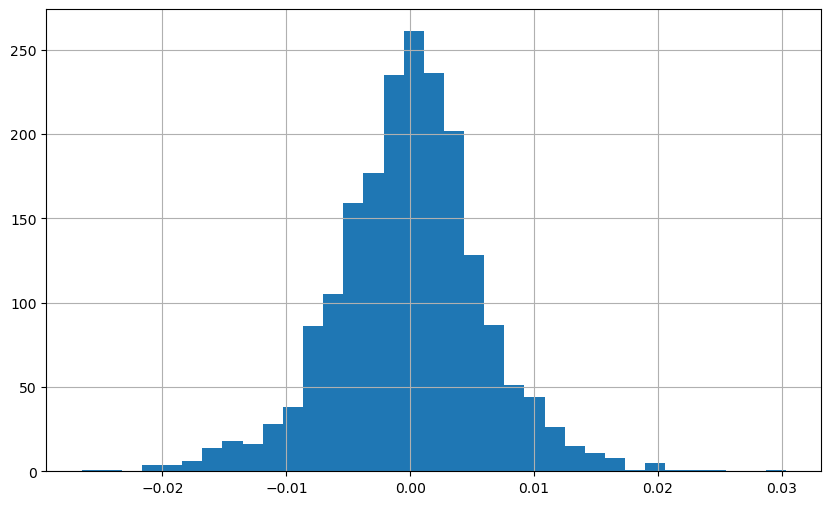

In [10]:
data['returns'].hist(bins=35, figsize=(10, 6))

In [11]:
# Create a lagging function
lags = 2
def create_lags(data):
    global cols
    cols = []
    for lag in range(1, lags+1):
        col = 'lag_{}'.format(lag)
        data[col] = data['returns'].shift(lag)
        cols.append(col)

In [12]:
create_lags(data)

In [13]:
data.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-05,1.4368,-0.002988,-1,NaN,NaN
2010-01-06,1.4412,0.003058,1,-0.002988,NaN
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544


In [14]:
data.dropna(inplace=True)

In [15]:
data.head()

,EUR=,returns,direction,lag_1,lag_2
Date,,,,,
2010-01-07,1.4318,-0.006544,-1,0.003058,-0.002988
2010-01-08,1.4412,0.006544,1,-0.006544,0.003058
2010-01-11,1.4513,0.006984,1,0.006544,-0.006544
2010-01-12,1.4494,-0.001310,-1,0.006984,0.006544
2010-01-13,1.4510,0.001103,1,-0.001310,0.006984


<Axes: xlabel='lag_1', ylabel='lag_2'>

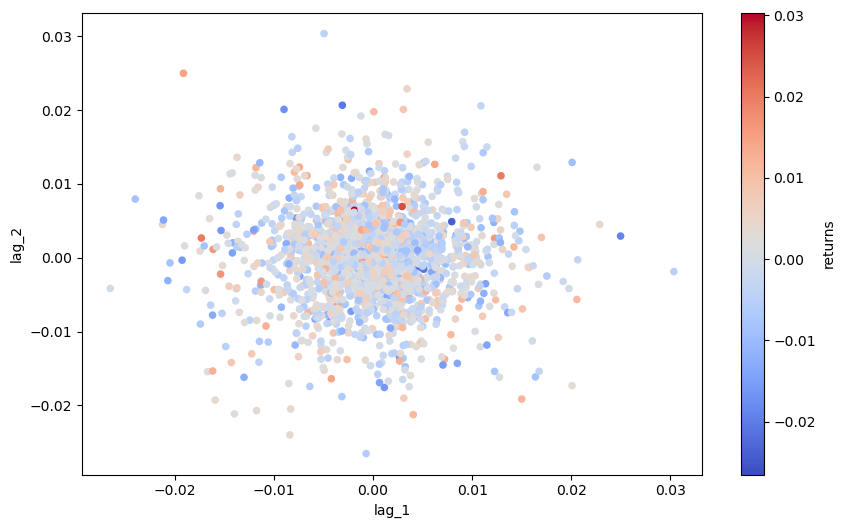

In [16]:
data.plot.scatter(x='lag_1', y='lag_2', c='returns',
                 cmap='coolwarm', figsize=(10, 6), colorbar=True)

### Part II: Building an OLS Regression operator

#### With the dataset completed, the Linear OLS regression can be applied to learn about any potential (linear) relationships, to predict market movement based on the features, and to backtest a trading strategy based on the predictions. Two basic approaches are available: using the log returns or only the direction data as the dependent variable during the regression. In any case, predictions are real-valued and therefore transformed to either +1 or -1 to only work with the direction of the prediction:

In [17]:
from sklearn.linear_model import LinearRegression

# X represents the input data, and Y is the target one
X = data[cols]
Y_return = data['returns']
Y_direction = data['direction']

#### The linear OLS regression implementation from scikit-learn is used, where the regression models of 'pos_ols_1' and 'pos_ols_2' separately correspond to the featuers of Log-returns and Directions. 

In [18]:
model_return =  LinearRegression()
model_direction = LinearRegression()

# Write your code to fit the OLS linear regression models based on the features of Y_return and Y_direction, respectively
model_return.fit(data[cols], data['returns'])
model_direction.fit(data[cols], data['direction'])

# Write your code to predict 
data['pos_ols_1'] = model_return.predict(X)
data['pos_ols_2'] = model_direction.predict(X)

data[['pos_ols_1', 'pos_ols_2']].head()

,pos_ols_1,pos_ols_2
Date,,
2010-01-07,-0.000202,-0.004063
2010-01-08,0.000046,0.043384
2010-01-11,-0.000310,-0.019115
2010-01-12,-0.000143,-0.042655
2010-01-13,0.000007,0.005976


#### Only maintain the samples with two positive results

In [19]:
data[['pos_ols_1', 'pos_ols_2']] = np.where(data[['pos_ols_1', 'pos_ols_2']] > 0, 1, -1)

In [20]:
data['pos_ols_1'].value_counts()

-1    1605
 1     364
Name: pos_ols_1, dtype: int64

In [21]:
data['pos_ols_2'].value_counts()

 1    1231
-1     738
Name: pos_ols_2, dtype: int64

### Part III: Backtesting

#### Equipped with the directional prediction, vectorized backtesting can be applied to judge the performance of the resulting trading strategies. At this stage, the analysis is based on a number of simplifying assumptions, such as "zero transaction costs" and the usage of the same dataset for both training and testing. Under these assumptions, however, both regression-based strategies outperform the benchmark passive investment, while only the strategy trained on the direction of the market shows a positive overall performance.

In [22]:
data['strat_ols_1'] = data['pos_ols_1'] * data['returns']
data['strat_ols_2'] = data['pos_ols_2'] * data['returns']
data[['returns', 'strat_ols_1', 'strat_ols_2']].sum().apply(np.exp)

returns        0.807938
strat_ols_1    1.345052
strat_ols_2    1.418594
dtype: float64

#### The real-valued predictions are transformed to directional values (+1, -1). The two approaches yield different directional predictions in general, but both lead to a relatively large number of trades over time.

In [23]:
(data['direction'] == data['pos_ols_1']).value_counts()

True     989
False    980
dtype: int64

In [24]:
(data['direction'] == data['pos_ols_2']).value_counts() 

True     1023
False     946
dtype: int64

#### Shows the number of correct and false predictions by the strategies

<Axes: xlabel='Date'>

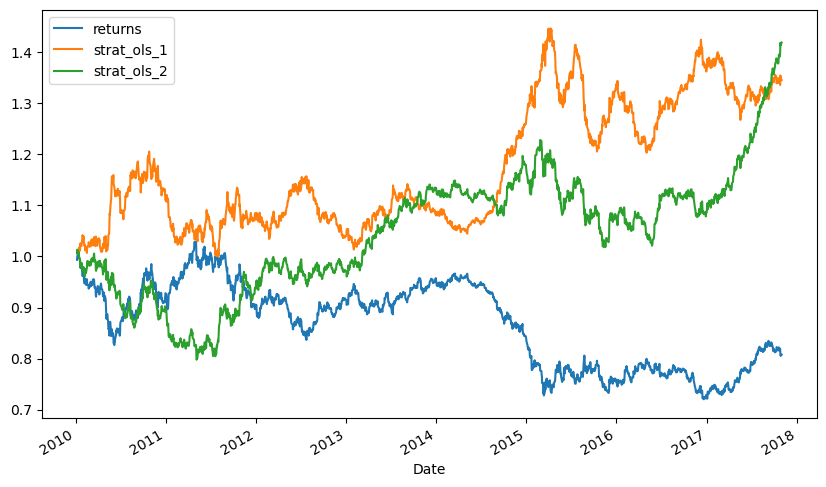

In [25]:
data[['returns', 'strat_ols_1', 'strat_ols_2']].cumsum().apply(np.exp).plot(figsize=(10, 6))